In [12]:
import pandas as pd
df = pd.read_csv('wear_cloth_depends_weather.csv')
df

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [13]:
df.head()

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temperature   8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [15]:
df = df.drop('Days', axis=1)
df.head()

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [19]:
y = df['Wear Jacket?']
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [20]:
x = df.drop('Wear Jacket?', axis=1)
x.head()

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


# Preprocessing

In [26]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
x.Outlook = le.fit_transform(df['Outlook'])
x.head()

,Outlook,Temperature,Routine
0,1,Cold,Indoor
1,0,Cold,Indoor
2,0,Warm,Outdoor
3,1,Cold,Outdoor
4,0,Cold,Outdoor


In [29]:
x.Temperature = le.fit_transform(df['Temperature'])
x.Routine = le.fit_transform(df['Routine'])
x.head()

,Outlook,Temperature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf.fit(x,y) #Train with full data set

DecisionTreeClassifier()

In [34]:
clf.predict([[1,0,0]]) #1=Sunny;  0=Cold;  0=Indoor

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [35]:
#Sunny=1, Cloudy=0 #Outlook
#Cold=0, Warm=1    #Temperature
#Indoor=0, Outdoor=1 #Routine

In [43]:
clf.predict([[0,0,1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

# Showing The Tree

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

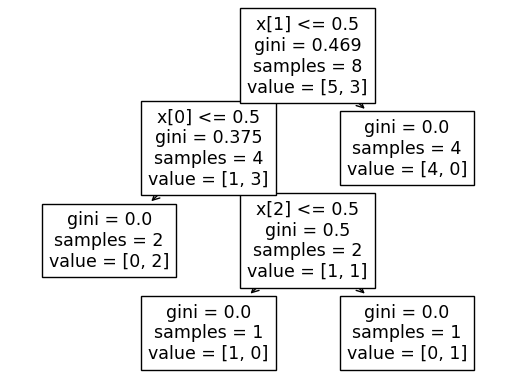

In [44]:
from sklearn import tree
tree.plot_tree(clf)

In [45]:
x.columns

Index(['Outlook', 'Temperature', 'Routine'], dtype='object')

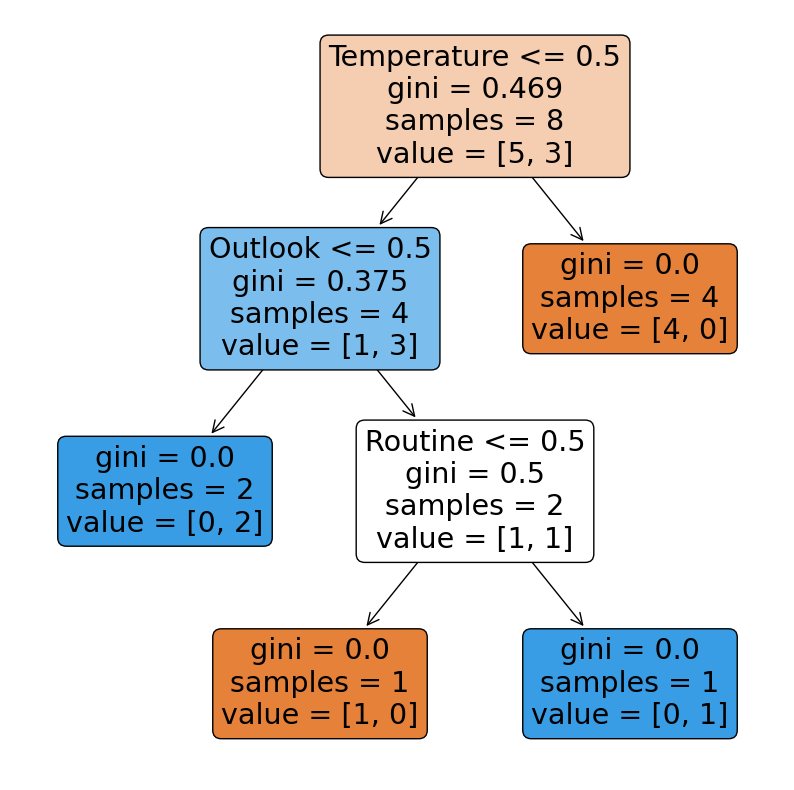

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png')